In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Question1**

a) Describe the data preprocessing. Justify your answers.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt


#read csv file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataMining/assignment01/NOxEmissions.csv");
#how many obversations
print(df.shape[0])
#show the columns names
print(list(df.columns))
#check if there are any null values in csv
print("check if there are any null values in csv？",df.isnull().values.any())
df.isnull().sum()
#there is no null values, so donot need to dropna
#df_no_na = df.dropna()


print("sqrtWS has any outliers? ",((df["sqrtWS"] < 0) | (df["sqrtWS"] > 10)).values.any() )
print("LNOx has any outliers? ",((df["LNOx"] < 1) | (df["LNOx"] > 10)).values.any())
print("LNOxEm has any outliers? ",((df["LNOxEm"] < 1) | (df["LNOxEm"] > 10)).values.any())
#julday 373 ... 730
print("julday has any outliers? ",((df["julday"] < 373) | (df["julday"] > 730)).values.any() )


#print the error line
print(df[(df["LNOx"] < 1) | (df["LNOx"] > 10) | (df["julday"] < 373) | (df["julday"] > 730)])
#remove the error line
df = df[(df["LNOx"] <= 10) & (df["LNOx"] >= 1)]
df = df[(df["julday"] <= 730) & (df["julday"] >= 373)]
print("LNOx has any outliers? ",((df["LNOx"] < 1) | (df["LNOx"] > 10)).values.any())
print("julday has any outliers? ",((df["julday"] < 373) | (df["julday"] > 730)).values.any() )

print(df.shape[0])


#Finally we get 8064 obversations

8088
['rownames', 'julday', 'LNOx', 'LNOxEm', 'sqrtWS']
check if there are any null values in csv？ False
sqrtWS has any outliers?  False
LNOx has any outliers?  True
LNOxEm has any outliers?  False
julday has any outliers?  False
      rownames  julday      LNOx    LNOxEm    sqrtWS
99         292     377  0.993252  5.049947  2.041201
147        340     379  0.182322  5.198051  2.636285
692        937     404  0.974560  5.363284  2.623547
693        938     404  0.559616  5.027717  2.489980
694        939     404  0.530628  4.578813  2.493291
695        940     404  0.405465  5.083769  2.572256
763       1008     406  0.916291  6.145535  2.291288
764       1009     407  0.530628  5.747695  2.355844
765       1010     407  0.371564  5.515545  2.236068
766       1011     407 -0.105361  5.154646  2.175661
1172      1418     424  0.741937  5.907316  2.164140
1173      1419     424  0.500775  5.386530  2.190890
1174      1420     424  0.832909  5.456846  2.243546
1175      1421     424  0.97

b) describe the distribution of the variable LNOx.

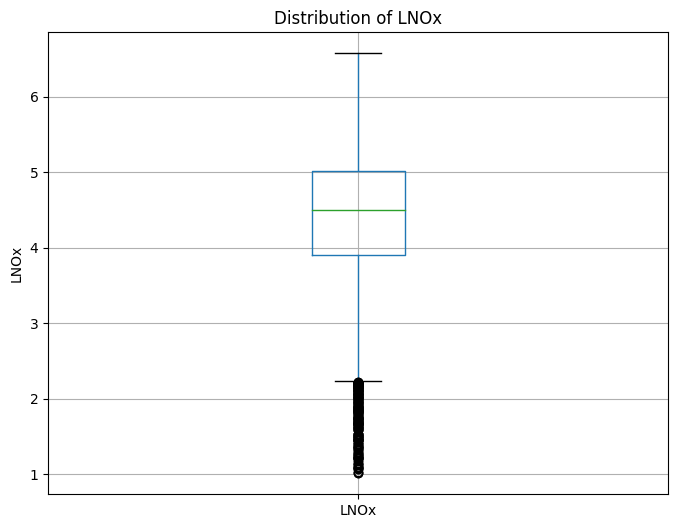

count    8064.000000
mean        4.389661
std         0.916800
min         1.011601
25%         3.899950
50%         4.498976
75%         5.014046
max         6.576121
Name: LNOx, dtype: float64

In [3]:
# draw a boxplot
plt.figure(figsize=(8, 6))
df.boxplot(column='LNOx')
plt.title('Distribution of LNOx')
plt.ylabel('LNOx')
plt.show()
# show detail number
df['LNOx'].describe()


(c) Fit a linear model to explain the variable LNOx as a function of LNOxEm and sqrtWS. Comment on the model. Justify your answer.

In [4]:
import statsmodels.formula.api as smf
mod = smf.ols("LNOx ~  LNOxEm +  sqrtWS", data = df)
mod_res = mod.fit()
print(mod_res.summary())
# R-suqred is 0.655,  This means that the model explains 66% of the variability of LNOx.

# coef of LNOxEm is 0.6318, For each unit increase in 'LNOxEm',
    #'LNOx' is expected to increase by approximately 0.6318 units,
    # keeping the rest of predictors fixed.

# coef of sqrtWS is -0.9977, For each unit increase in 'sqrtWS',
    #'LNOx' is expected to decrease by approximately 0.9977 units,
    # keeping the rest of predictors fixed.
# Intercept is 1.1091,the expected value of 'LNOx' when both 'LNOxEm' and 'sqrtWS' are zero.
# Both p_value is 0. very low, indicating a possible violation of the normality assumption.
# the model means that both 'LNOxEm' and 'sqrtWS' significantly effects 'LNOx'
# the model fits the data well.


                            OLS Regression Results                            
Dep. Variable:                   LNOx   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     7667.
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:30:47   Log-Likelihood:                -6445.2
No. Observations:                8064   AIC:                         1.290e+04
Df Residuals:                    8061   BIC:                         1.292e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1091      0.046     24.322      0.0

d)discuss the relationship between the dependent and independent variables. Interpret in a way that someone who is not familiar with the field can understand the parameter associated to the predictor LNOxEm.

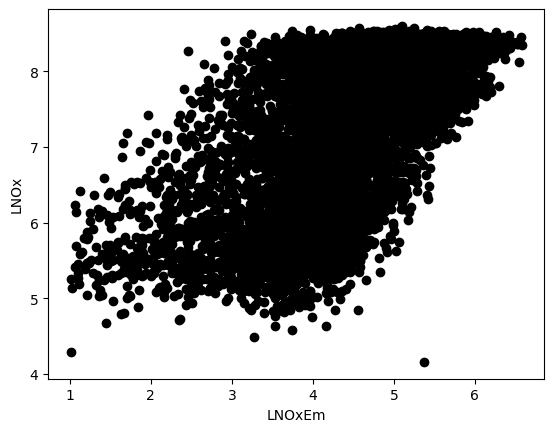

[[1.         0.63574716]
 [0.63574716 1.        ]]


In [5]:

'''
In the model, "LNOx" represents a certain pollutant concentration,
while "LNOxEm" and "sqrtWS" are predictors that influence this concentration.
"LNOxEm" likely refers to some emission measure related to the pollutant,
and "sqrtWS" could represent a square root transformation of wind speed,
which may affect pollutant dispersion.

The coefficient associated with "LNOxEm" indicates that for every one-unit
increase in the emission measure (LNOxEm), the pollutant concentration (LNOx) is
 expected to increase by approximately 0.6318 units,keeping the rest of
 predictors fixed.
 This means that higher emission levels are associated with higher pollutant
 concentrations in the air.

Conversely, the coefficient for "sqrtWS" suggests that for every one-unit
increase in the square root of wind speed,the pollutant concentration is
expected to decrease by approximately 0.9977 units, keeping the rest of
predictors fixed.
This means that higher wind speeds may lead to better dispersion of pollutants,
resulting in lower pollutant concentrations.

Overall, the model indicates that both emission levels and wind speed are
significant factors influencing pollutant concentrations.
Higher emissions tend to increase pollutant levels,
while higher wind speeds tend to decrease them.
'''


import numpy as np
#import scipy.stats

plt.scatter(df["LNOx"], df["LNOxEm"], color='black')
plt.xlabel("LNOxEm")
plt.ylabel("LNOx")
plt.show()

cc_x_em = np.corrcoef(df["LNOx"], df["LNOxEm"])
print(cc_x_em)
# The correlation coefficient is strong, namely, 0.64.  strong linear relationship.

e)Predict the Nitrogen Oxides concentration for a LNOxEm = 7.5 and sqrtWS = 1.3.
Interpret your results in a way that someone who is not familiar with linear models can
understand.

In [6]:
# LNOxEm = 7.5 and sqrtWS = 1.3
data1 = {'LNOxEm': [7.5], 'sqrtWS': [1.3]}

# Predict NOx concentration
predicted_NOx = mod_res.predict(data1)

# Print the predicted NOx concentration
print("Predicted Nitrogen Oxides concentration:", predicted_NOx.values[0])

#Based on the model's prediction, when LNOxEm (nitrogen oxide emissions) is 7.5
#   and sqrtWS (square root of wind speed) is 1.3,
#the predicted nitrogen oxide concentration is approximately 4.55.

#This means that given the specified levels of nitrogen oxide emissions and wind
# speed, we anticipate a nitrogen oxide concentration of around 4.55

Predicted Nitrogen Oxides concentration: 4.550595589905853


**Question2**

**(a)** Describe the data preprocessing. Justify your answers. [3]

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


#read csv file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataMining/assignment01/nassCDS.csv");
#how many obversations
print(df.shape[0])
#show the columns names
print(list(df.columns))
#check if there are any null values in csv
print(df.isnull().values.any())
df.isnull().sum()
#there is 154 values, so need to dropna
df = df.dropna()

#check if age and year are illegal data
print("ageOFocc has any outliers? "
,((df["ageOFocc"] < 0) | (df["ageOFocc"] > 100)).values.any())

print("yearVeh has any outliers? "
,((df["yearVeh"] < 1900) | (df["yearVeh"] > 2003)).values.any())


#check data balance
response_count = df.groupby("dead")["dead"].count();
print(response_count);
print("Percentage of 0s:", 100*response_count[0]/np.sum(response_count));
print("Percentage of 1s:", 100*response_count[1]/np.sum(response_count));

df.describe();
## the data is unbalanced.  95% alive

# balance the data through Oversampling

from sklearn.utils import resample

df_minority = df[(df['dead']=='dead')];
df_majority = df[(df['dead']=='alive')];
df_minority_upsampled = resample(df_minority,
                  replace=True,     # sample with replacement
                  n_samples= response_count[0], # to match majority class
                  random_state=123);  # reproducible results
# reseting row numbers
df_minority_upsampled.reset_index(drop=True, inplace=True);

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority]);
response_count = df_upsampled.groupby("dead")["dead"].count();
print(response_count);

#assign back to df
df= df_upsampled




26217
['rownames', 'dvcat', 'weight', 'dead', 'airbag', 'seatbelt', 'frontal', 'sex', 'ageOFocc', 'yearacc', 'yearVeh', 'abcat', 'occRole', 'deploy', 'injSeverity', 'caseid']
True
ageOFocc has any outliers?  False
yearVeh has any outliers?  False
dead
alive    24883
dead      1180
Name: dead, dtype: int64
Percentage of 0s: 95.47250892069216
Percentage of 1s: 4.527491079307831
dead
alive    24883
dead     24883
Name: dead, dtype: int64


**(b)** Is the use of the seat belt independent of whether the passenger survives or not? Justify your answer. Use only the variables related to this question in your analysis

In [8]:
from scipy.stats import chi2_contingency

data_crosstab = pd.crosstab(df['dead'], df['seatbelt']); # contingency table
print("cross table","\n",data_crosstab)

print(chi2_contingency(data_crosstab));
# Chi-square value, p-value, degrees of freedom,
# andexpected frequencies as an array.

# p-value is 0 , Therefore,  strong evidence against H0.
# This means that  there is a significant association between passenger survival
# status and whether they were wearing a seatbelt.


cross table 
 seatbelt  belted   none
dead                   
alive      17965   6918
dead       10525  14358
Chi2ContingencyResult(statistic=4543.383764287064, pvalue=0.0, dof=1, expected_freq=array([[14245., 10638.],
       [14245., 10638.]]))


**(c)** Is there a mean age difference between the following injury severity (injSeverity) groups:
 none, possible injury, no incapacity, incapacity, and killed? Justify your answer. Use only
 the variables related to this question in your analysis.

In [9]:
import pandas as pd
from scipy.stats import f_oneway

#filter data where injSeverity in " none, possible injury, no incapacity,
# incapacity, and killed"

filtered_data = df[df['injSeverity'].isin([0, 1, 2, 3, 4])]

severity_counts = filtered_data['injSeverity'].value_counts()

print(severity_counts)

#print(filtered_data.head(10))

# Group data by 'injSeverity'
grouped_data = filtered_data.groupby('injSeverity')['ageOFocc']

# Extract age data for each group
groups = [group.values for _, group in grouped_data]

print(groups)
# Perform ANOVA analysis
f_statistic, p_value = f_oneway(*groups)

# Output the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

#The p-value is very close to 0, we reject the H0
#So there are significant differences in mean age between
# the injury severity groups.

#In other words, the mean age varies significantly across
# different injury severity categories.


injSeverity
4.0    22876
3.0    10256
0.0     6478
1.0     5616
2.0     4387
Name: count, dtype: int64
[array([18, 21, 33, ..., 17, 18, 17]), array([71, 71, 71, ..., 26, 46, 19]), array([82, 50, 50, ..., 25, 45, 54]), array([88, 62, 92, ..., 29, 34, 27]), array([25, 60, 27, ..., 46, 35, 69])]
F-statistic: 335.570241822525
P-value: 1.6476031177590216e-285


**(d)**Fit a model that explains the dependent variable as a function of airbag, seatbelt, frontal,sex, ageOFocc, yearVeh, and deploy.

In [10]:
import statsmodels.formula.api as smf
import statsmodels.api as sm;
from sklearn.model_selection import train_test_split


mode_str = "dead ~ C(airbag) + C(seatbelt) + C(frontal) + C(sex) + ageOFocc  + yearVeh + C(deploy)"

# Deleting yearVeh since it has the highest p-value
mode_str = "dead ~ C(airbag) + C(seatbelt) + C(frontal) + C(sex) + ageOFocc + C(deploy)"

model  = sm.GLM.from_formula(mode_str, family = sm.families.Binomial(),
                             data=df);
result = model.fit();
# Just to check the adequacy of the model
# Note that the scale parameter is close to 1, so the logistic regression model
# provides an adequate fit for the data
print(result.summary());

#another approach
#result2 = model.fit(scale="X2");
#print(result2.summary());


                       Generalized Linear Model Regression Results                       
Dep. Variable:     ['dead[alive]', 'dead[dead]']   No. Observations:                49766
Model:                                       GLM   Df Residuals:                    49759
Model Family:                           Binomial   Df Model:                            6
Link Function:                             Logit   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:                -29281.
Date:                           Sun, 07 Apr 2024   Deviance:                       58563.
Time:                                   00:30:59   Pearson chi2:                 4.98e+04
No. Iterations:                                4   Pseudo R-squ. (CS):             0.1890
Covariance Type:                       nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
------------

Use 70% to train the model and 30% to test it. Comment on the performance of the model in a way that someone who is not familiar with the concepts can understand.

In [11]:
X = df.drop(columns=['dead']);
y = df['dead'];

# Here we define training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,shuffle=True);

aux = pd.concat([X_train, y_train], axis = 1);

model  = sm.GLM.from_formula(mode_str, family = sm.families.Binomial(),
                             data=aux);
result = model.fit();
print(result.summary());


### Checking Overdispersion ###

# Since there are many group predictors, in which case the overdispersion can occur. so we will check it.

import scipy;

dev = result.deviance; # Residual Deviance
dof = result.df_resid; # Degree of freedoms of Residuals
pvalue = 1 - scipy.stats.chi2.cdf(dev, dof); # p-value

# H0: Logistic regression model provides an adequate fit for the data
# H1: Logistic regression model does not provide an adequate fit for the data

if pvalue < 0.05:
    print("Saturated model -- p-value: ", pvalue);
else :
    print("Logistic model is ok -- p-value=", pvalue);


# Rules of thumb
# Calculation of Pearson chi2 / n - (p+1)
print("Pearson2 / Df",result.pearson_chi2 / result.df_resid);
# This value is close to 1

# We can also fit a quasi-binomial model
result2 = model.fit(scale="X2");
print(result2.summary());


# The scale parameter is close to 1 in this model

# Conclusion: the logistic regression model provides an adequate fit for the data,
# even though this hypothesis was rejected according to the chi-square test.



### Predictions Result ###
predictions = result.predict(X_test);
predictions_nominal = [ "dead" if x < 0.5 else "alive" for x in predictions];

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, predictions_nominal)
print("Confusion matrix: ", cm);
# The diagonal elements of the confusion matrix indicate correct predictions,
#  while the off-diagonals represent incorrect predictions

# The logistic regression correctly predicted dead 67.9% of the times
print("Accuracy: ", round(np.sum(np.diagonal(cm))/np.sum(cm),3));

# The model correctly predicted 68.6% of dead
print("Sensitivity: ", round(cm[1,1]/np.sum(cm[1,:]),3));

# The model correctly predicted 67.3% of the times those alive
print("Specificity: ", round(cm[0,0]/np.sum(cm[0,:]),3));

# We can also get those values as follows
print(classification_report(y_test,predictions_nominal,digits = 3))

#verall, the model demonstrates moderate accuracy and performs reasonably well
# in identifying both positive and negative cases,
#although there is room for improvement



                       Generalized Linear Model Regression Results                       
Dep. Variable:     ['dead[alive]', 'dead[dead]']   No. Observations:                34836
Model:                                       GLM   Df Residuals:                    34829
Model Family:                           Binomial   Df Model:                            6
Link Function:                             Logit   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:                -20487.
Date:                           Sun, 07 Apr 2024   Deviance:                       40973.
Time:                                   00:31:02   Pearson chi2:                 3.48e+04
No. Iterations:                                4   Pseudo R-squ. (CS):             0.1895
Covariance Type:                       nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
------------

**e)** Interpret the parameter associated to seatbelt and ageOFocc in a way that anybody can understand



In [12]:
print('If we increase in one unit seatbelt, the log odds of dead is expected to decrease in',\
      round(result.params["C(seatbelt)[T.none]"],3), ", holding the other predictors constant.")

print('If we increase in one unit seatbelt, the odds of dead is expected to decrease in ',\
      round( np.exp(result.params["C(seatbelt)[T.none]"]),3), ", holding the other predictors constant.")


print('If we increase in one unit ageOFocc, the log odds of dead is expected to decrease in',\
      round(result.params["ageOFocc"],3), ", holding the other predictors constant.")

print('If we increase in one unit ageOFocc, the odds of dead is expected to decrease in ',\
      round( np.exp(result.params["ageOFocc"]),3), ", holding the other predictors constant.")



If we increase in one unit seatbelt, the log odds of dead is expected to decrease in -1.413 , holding the other predictors constant.
If we increase in one unit seatbelt, the odds of dead is expected to decrease in  0.243 , holding the other predictors constant.
If we increase in one unit ageOFocc, the log odds of dead is expected to decrease in -0.026 , holding the other predictors constant.
If we increase in one unit ageOFocc, the odds of dead is expected to decrease in  0.974 , holding the other predictors constant.


**(f)** Predict the odds of not surviving for the following two scenarios:

In [13]:

#====================================================================
#1.There is no airbag, the passenger is not wearing seatbelt, it is a frontal impact,
#the passenger is female 70 years old, and the airbag is not deployed.

predX = {"airbag":["none"],"seatbelt":["none"], "frontal":[1],"sex":["f"], "ageOFocc":[70], "deploy":[0]};
predX = pd.DataFrame(data=predX);

#mode_str = "dead ~ C(airbag) + C(seatbelt) + C(frontal) + C(sex) + ageOFocc + C(deploy)"
pred_d = result.predict(predX);
print(pred_d);

prediction = ["dead" if x < 0.5 else "alive" for x in pred_d];
print(prediction);


# Calculate the odds of  surviving
pred_odds_not_surviving = pred_d / (1 - pred_d)

# Print the odds of not surviving
print("Odds of not surviving:", pred_odds_not_surviving)

#====================================================================

#2. There is airbag, the passenger is wearing seatbelt, it is a frontal impact, the passenger
#is female 70 years old, and the airbag is deployed.


predX = {"airbag":["airbag"],"seatbelt":["belted"], "frontal":[1],"sex":["f"], "ageOFocc":[70], "deploy":[1]};
predX = pd.DataFrame(data=predX);

#mode_str = "dead ~ C(airbag) + C(seatbelt) + C(frontal) + C(sex) + ageOFocc + C(deploy)"
pred_d = result.predict(predX);
print(pred_d);

prediction = ["dead" if x < 0.5 else "alive" for x in pred_d];
print(prediction);


# Calculate the odds of  surviving
pred_odds_not_surviving = pred_d / (1 - pred_d)

# Print the odds of not surviving
print("Odds of not surviving:", pred_odds_not_surviving)


#====================================================================
#Interpret  results

#For the scenario where the individual is predicted to be "dead":
#The probability of not surviving is approximately 0.231,
# which corresponds to odds of not surviving being approximately 0.301.

#For the scenario where the individual is predicted to be "alive":
#The probability of not surviving is approximately 0.597,
# which corresponds to odds of not surviving being approximately 1.485.


0    0.231434
dtype: float64
['dead']
Odds of not surviving: 0    0.301124
dtype: float64
0    0.597554
dtype: float64
['alive']
Odds of not surviving: 0    1.484807
dtype: float64


**Question3**

 **a)**Describe the data preprocessing. Justify your answers.

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


#read csv file
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/DataMining/assignment01/data_q3.xlsx");

#show the columns names
print(list(df.columns))
#only keep intrested columns
columns_to_keep = ['InboundRatio','InternationalStudentsNO'
                  ,'KOFPoGI', 'KOFEcGI', 'KOFSoGI'
                  , 'ISCED5 Percentage'
                  , 'ISCED6 Percentage', 'ISCED7 Percentage', 'ISCED8 Percentage'
                  ,'top_50_count','top_100_count','top_500_count','top_1000_count'
                  ,'WESP','country_x']
df = df[columns_to_keep]

#how many obversations
print(df.shape[0])
#check if there are any null values in csv
print(df.isnull().values.any())
print("df.isnull().sum()=",df.isnull().sum())

# Fill missing values in ISCED5 Percentage column with values from ISCED6 Percentage column
df['ISCED5 Percentage'].fillna(df['ISCED6 Percentage'], inplace=True)
# drop the null values row, which cannot get reasonable data
df.dropna(subset=['ISCED6 Percentage'], inplace=True)

print("check null again==============")
print("df.isnull().sum()=",df.isnull().sum())

#now, data likes good, have no null values.



['country_x', 'code', 'Tertiary Percentage', 'ISCED5 Percentage', 'ISCED6 Percentage', 'ISCED7 Percentage', 'ISCED8 Percentage', 'country_y', 'year', 'InternationalStudentsNO', 'KOFGI', 'KOFGIdf', 'KOFGIdj', 'KOFPoGI', 'KOFPoGIdf', 'KOFPoGIdj', 'KOFSoGI', 'KOFSoGIdf', 'KOFSoGIdj', 'KOFInGI', 'KOFInGIdf', 'KOFInGIdj', 'KOFIpGI', 'KOFIpGIdf', 'KOFIpGIdj', 'KOFCuGI', 'KOFCuGIdf', 'KOFCuGIdj', 'KOFEcGI', 'KOFEcGIdf', 'KOFEcGIdj', 'KOFTrGI', 'KOFTrGIdf', 'KOFTrGIdj', 'KOFFiGI', 'KOFFiGIdf', 'KOFFiGIdj', 'KOFSoGI_WithoutInterpersonal', 'InboundRatio', 'top_50_count', 'top_100_count', 'top_500_count', 'top_1000_count', 'total_ranked_universities', 'WESP']
49
True
df.isnull().sum()= InboundRatio               0
InternationalStudentsNO    0
KOFPoGI                    0
KOFEcGI                    0
KOFSoGI                    0
ISCED5 Percentage          7
ISCED6 Percentage          1
ISCED7 Percentage          1
ISCED8 Percentage          1
top_50_count               0
top_100_count             

In [15]:
#balance the data.
#At first, I Hesitated whether we need to balance the data,
# so I run twice, found the Upsampled data can get more clear resut.

response_count = df.groupby("WESP")["WESP"].count();
print(response_count)

#Hesitating whether to delete "Economies in transition"， run twice ,
# found that it did not affect the results, so comment it.
#df = df[df['WESP'] != "Economies in transition"]

response_count = df.groupby("WESP")["WESP"].count();
print(response_count)

# Oversampling
df_minority = df[(df['WESP']=="Developing")];
df_majority = df[(df['WESP']=="Developed")];

response_count = df.groupby("WESP")["WESP"].count();

df_minority_upsampled = resample(df_minority,
                  replace=True,           # sample with replacement
                  n_samples=len(df_majority),   # to match majority class
                  random_state=123);         # reproducible results
df_minority_upsampled.reset_index(drop=True, inplace=True);     # reseting row numbers

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority]);
df_upsampled.reset_index(drop=True, inplace=True) # removing row names
response_count = df_upsampled.groupby("WESP")["WESP"].count();
print("Upsampled data set: ", response_count);

df = df_upsampled


WESP
Developed                  33
Developing                 13
Economies in transition     2
Name: WESP, dtype: int64
WESP
Developed                  33
Developing                 13
Economies in transition     2
Name: WESP, dtype: int64
Upsampled data set:  WESP
Developed     33
Developing    33
Name: WESP, dtype: int64


In [16]:

#standardized========================

selected_columns = df[['InboundRatio','InternationalStudentsNO'
                  ,'KOFPoGI', 'KOFEcGI', 'KOFSoGI'
                  , 'ISCED5 Percentage', 'ISCED6 Percentage'
                  , 'ISCED7 Percentage', 'ISCED8 Percentage'
                  ,'top_50_count','top_100_count','top_500_count','top_1000_count']]
print(selected_columns.describe())
#The SDs are quite different. The data will be standardized.
from sklearn.preprocessing import StandardScaler
X = selected_columns
scaler = StandardScaler(); # creating object
fitted = scaler.fit(X);
X_std = pd.DataFrame(fitted.transform(X));


       InboundRatio  InternationalStudentsNO    KOFPoGI    KOFEcGI    KOFSoGI  \
count     66.000000                66.000000  66.000000  66.000000  66.000000   
mean       6.727092             91396.106061  86.303030  66.545455  76.181818   
std        7.359405            151990.361998   9.070611  15.324372  10.606107   
min        0.134930              1546.000000  60.000000  42.000000  55.000000   
25%        0.819470             12349.000000  81.250000  49.000000  65.500000   
50%        4.066260             38233.500000  90.000000  68.000000  79.500000   
75%        9.959855            114335.750000  92.000000  80.750000  85.750000   
max       35.293780            976562.000000  98.000000  90.000000  90.000000   

       ISCED5 Percentage  ISCED6 Percentage  ISCED7 Percentage  \
count          66.000000          66.000000          66.000000   
mean           16.024882          47.608810          11.709443   
std            19.257645          17.682161           8.491179   
min   

**b)** Perform an exhaustive K-mean cluster analysis on the variables of interest. How many clusters do you propose? Justify your answer. [15]

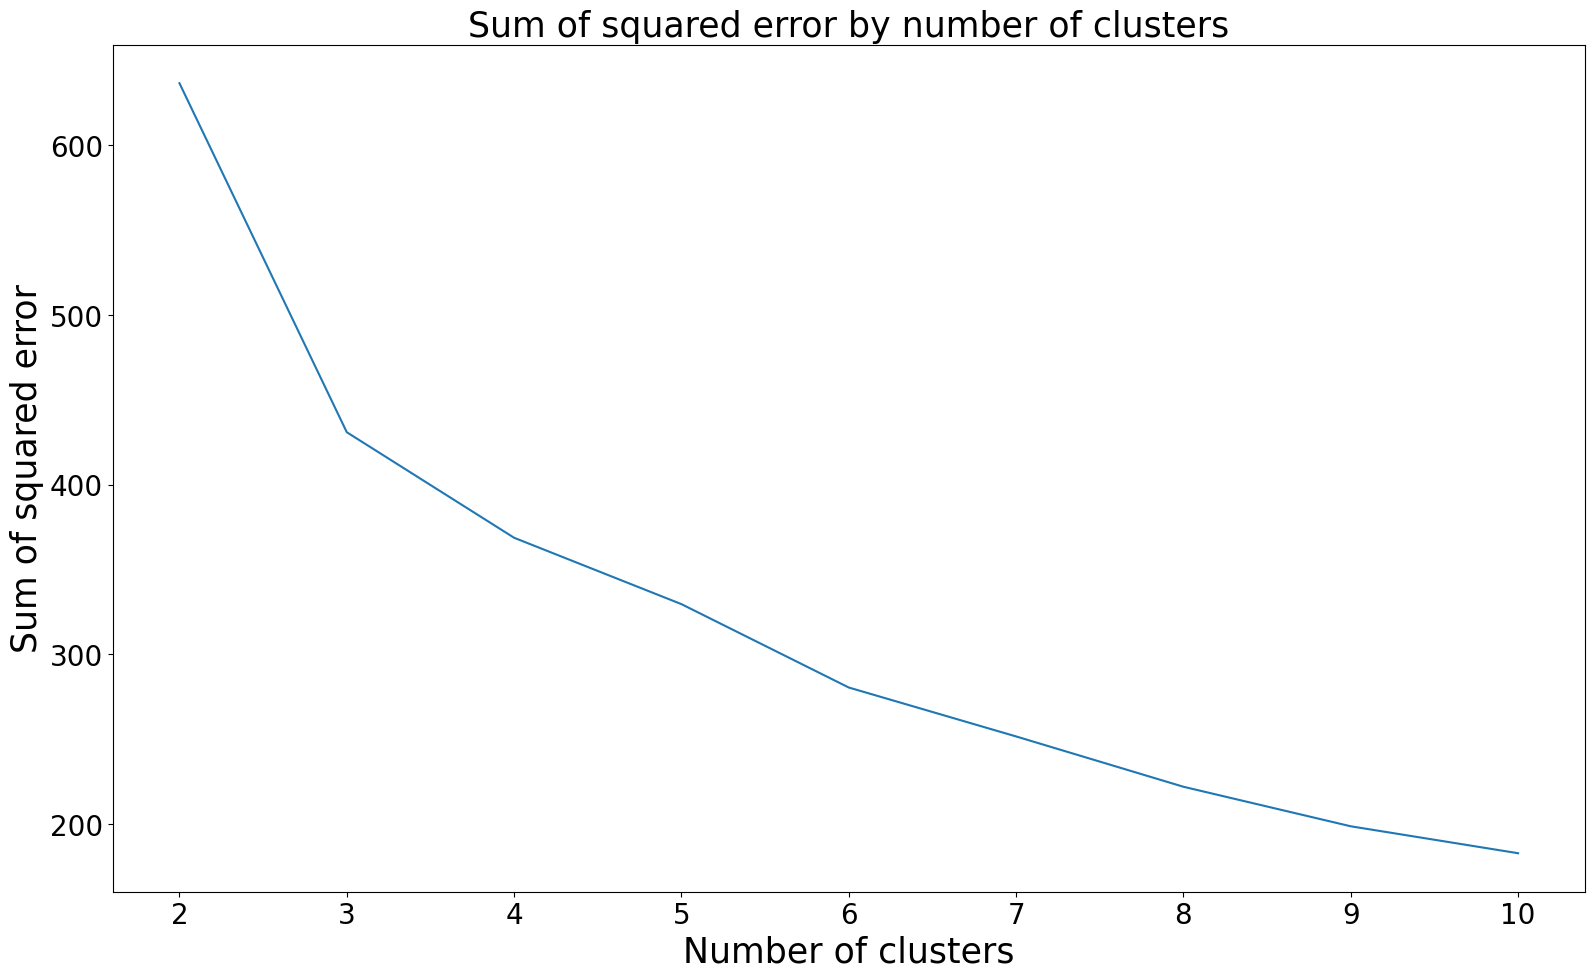

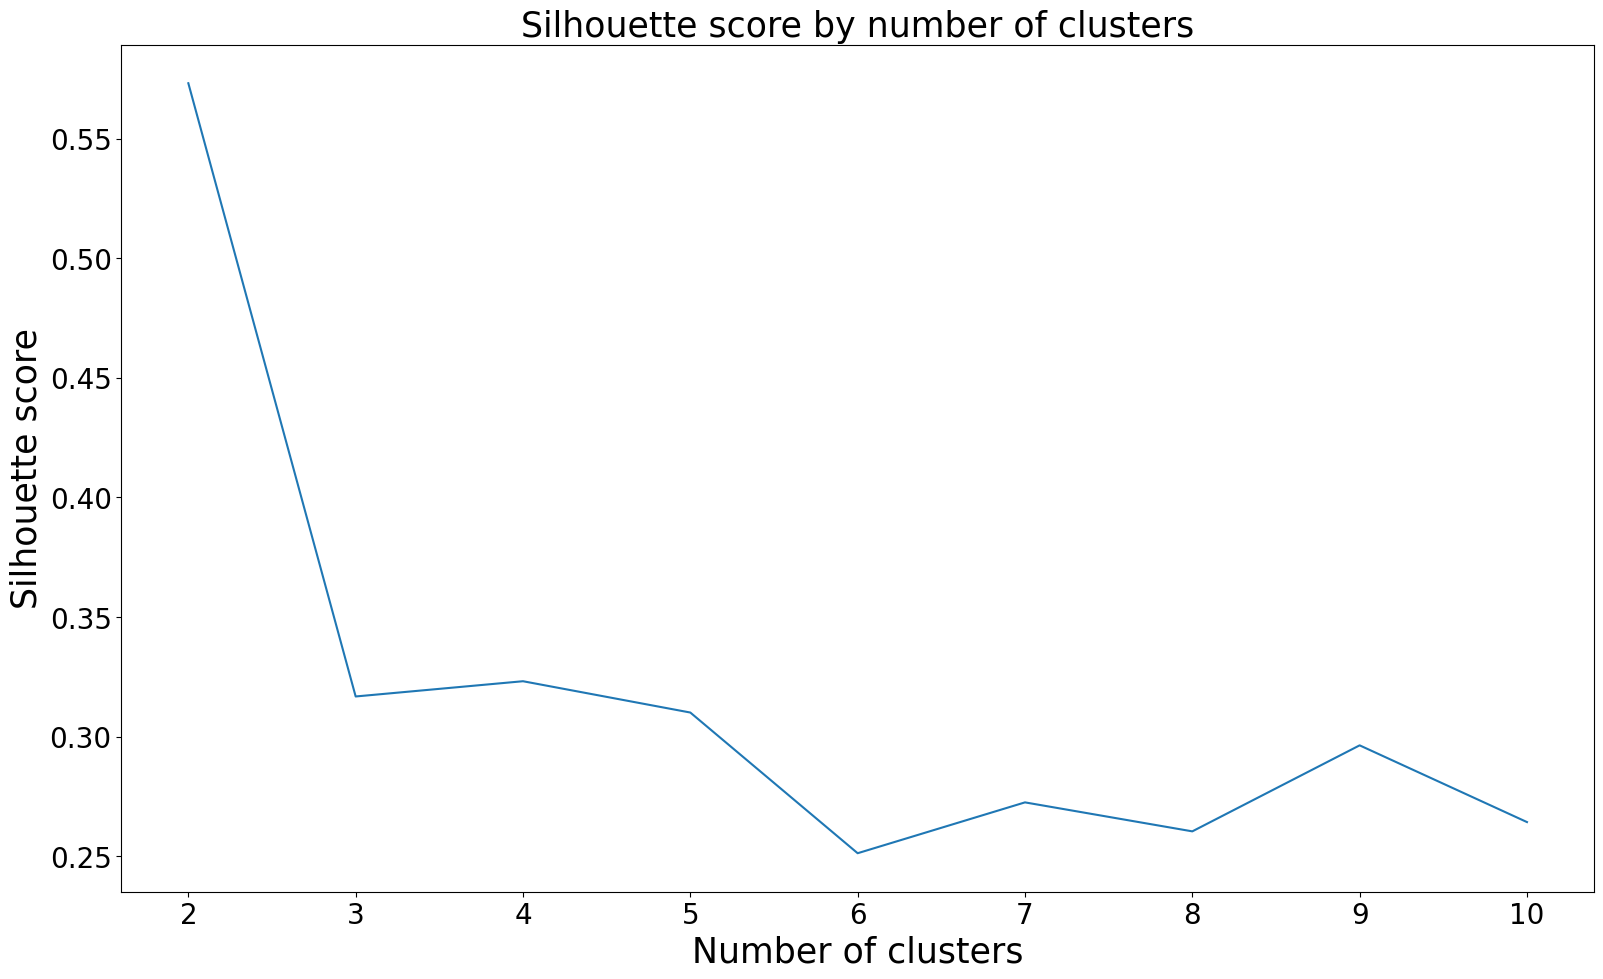

np.sum= 0.6606417907224937


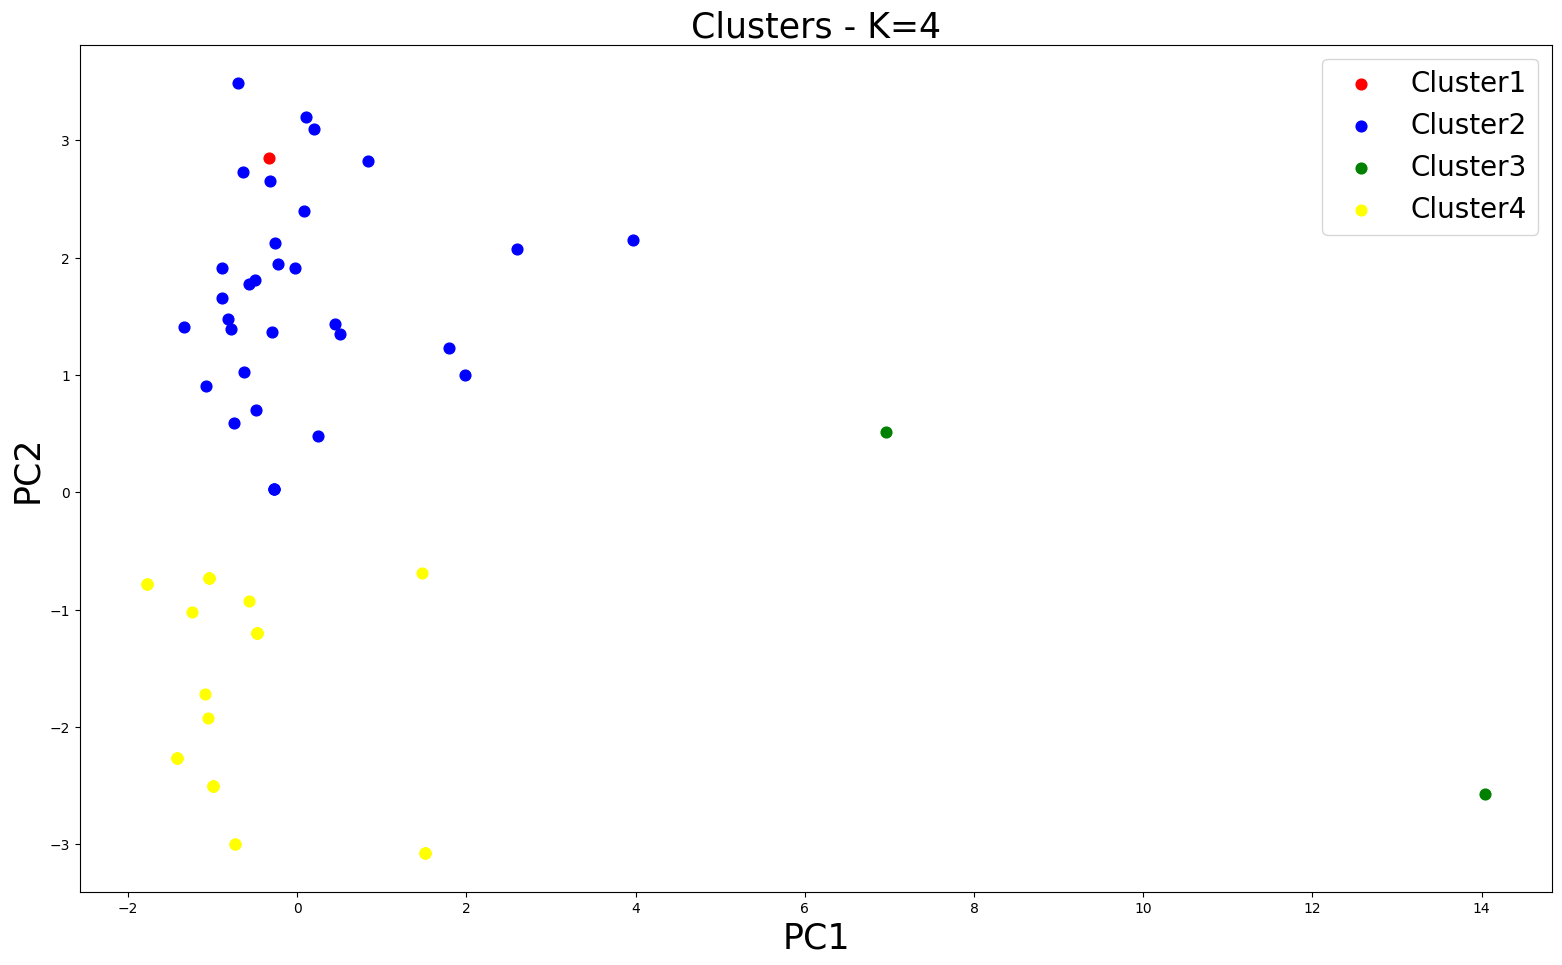

In [17]:

#Elbow method.
from sklearn.cluster import KMeans
def wcss(x, kmax):
  wcss_s = []
  for k in range(2, kmax + 1):
    # always keep random_state=0 in this assignment
    kmeans = KMeans(n_clusters = k, init = "k-means++", random_state = 0, n_init=10);
    kmeans.fit(x);
    # sample distances to closest cluster center
    wcss_s.append(kmeans.inertia_);
  return wcss_s

# Draw Plot to find Elbow
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
kmax = 10; # maximum number of clusters
ax.plot(range(2, kmax + 1), wcss(X_std, kmax));
ax.tick_params(axis="both", which="major", labelsize=20);
ax.set_xlabel("Number of clusters", fontsize = 25);
ax.set_ylabel("Sum of squared error", fontsize = 25);
ax.xaxis.set_major_locator(MaxNLocator(integer=True)); # to force intergers in x-axis
ax.set_title("Sum of squared error by number of clusters", fontsize = 25);
plt.show();

#The elbow point is determined visually. Here, it could be at K= 3,4 or 6.

#===========================================================================
#Silhouette score.
from sklearn.metrics import silhouette_score
def Silhouette(x, kmax):
  sil = []
  for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k, init = "k-means++", random_state = 0, n_init=10).fit(x)
    sil.append(silhouette_score(x, kmeans.labels_, metric = "euclidean"))
  return sil
# Plot
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
ax.plot(range(2,kmax+1), Silhouette(X_std,kmax));
ax.tick_params(axis="both", which="major", labelsize=20);
ax.set_xlabel("Number of clusters", fontsize = 25);
ax.set_ylabel("Silhouette score", fontsize = 25);
ax.set_title("Silhouette score by number of clusters", fontsize = 25);
plt.show();


#The silhouette score favors K= 2 or 4. However, K=2 has the highest
#sum of squared error. Therefore, we will explore K=4

#assess with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2);
principalComponents = pca.fit_transform(X_std);
print("np.sum=",np.sum(pca.explained_variance_ratio_));
#0.66
PCs = pd.DataFrame(data = principalComponents, columns = ["PC1", "PC2"]);
# we will explore K=4
n_clusters_kmeans = 4
kmeans = KMeans(n_clusters = n_clusters_kmeans, init = "k-means++", random_state = 0, n_init=10);
y_kmeans = kmeans.fit_predict(X_std);
# Plotting PCs
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
plt.scatter(PCs.iloc[y_kmeans == 0, 0], PCs.iloc[y_kmeans == 0, 1], s=60,
c="red", label = "Cluster1");

plt.scatter(PCs.iloc[y_kmeans == 1, 0], PCs.iloc[y_kmeans == 1, 1], s=60,
c="blue", label = "Cluster2");

plt.scatter(PCs.iloc[y_kmeans == 2, 0], PCs.iloc[y_kmeans == 2, 1], s=60,
c="green", label = "Cluster3");

plt.scatter(PCs.iloc[y_kmeans == 3, 0], PCs.iloc[y_kmeans == 3, 1], s=60,
c="yellow", label = "Cluster4");


plt.xlabel("PC1", fontsize = 25);
plt.ylabel("PC2", fontsize = 25);
ax.set_title(f"Clusters - K={n_clusters_kmeans}", fontsize = 25);
plt.legend(fontsize = 20);
plt.show();

#add the cluster label to the original dataset for further analyses
df["Cluster1"] = pd.DataFrame(y_kmeans);



**c)** Perform an agglomerative cluster analyses. How many clusters do you propose? Justify your answer


Variability explained by first 2 PCs:  0.661


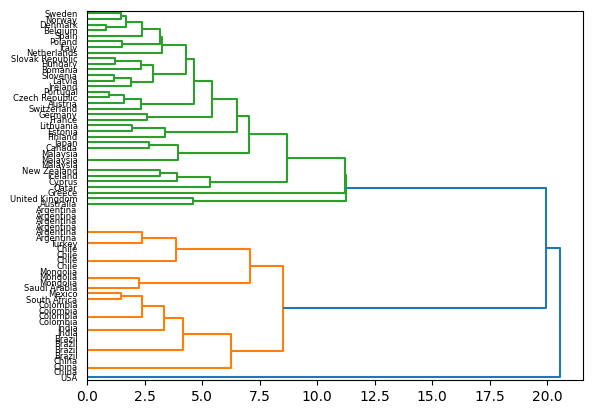

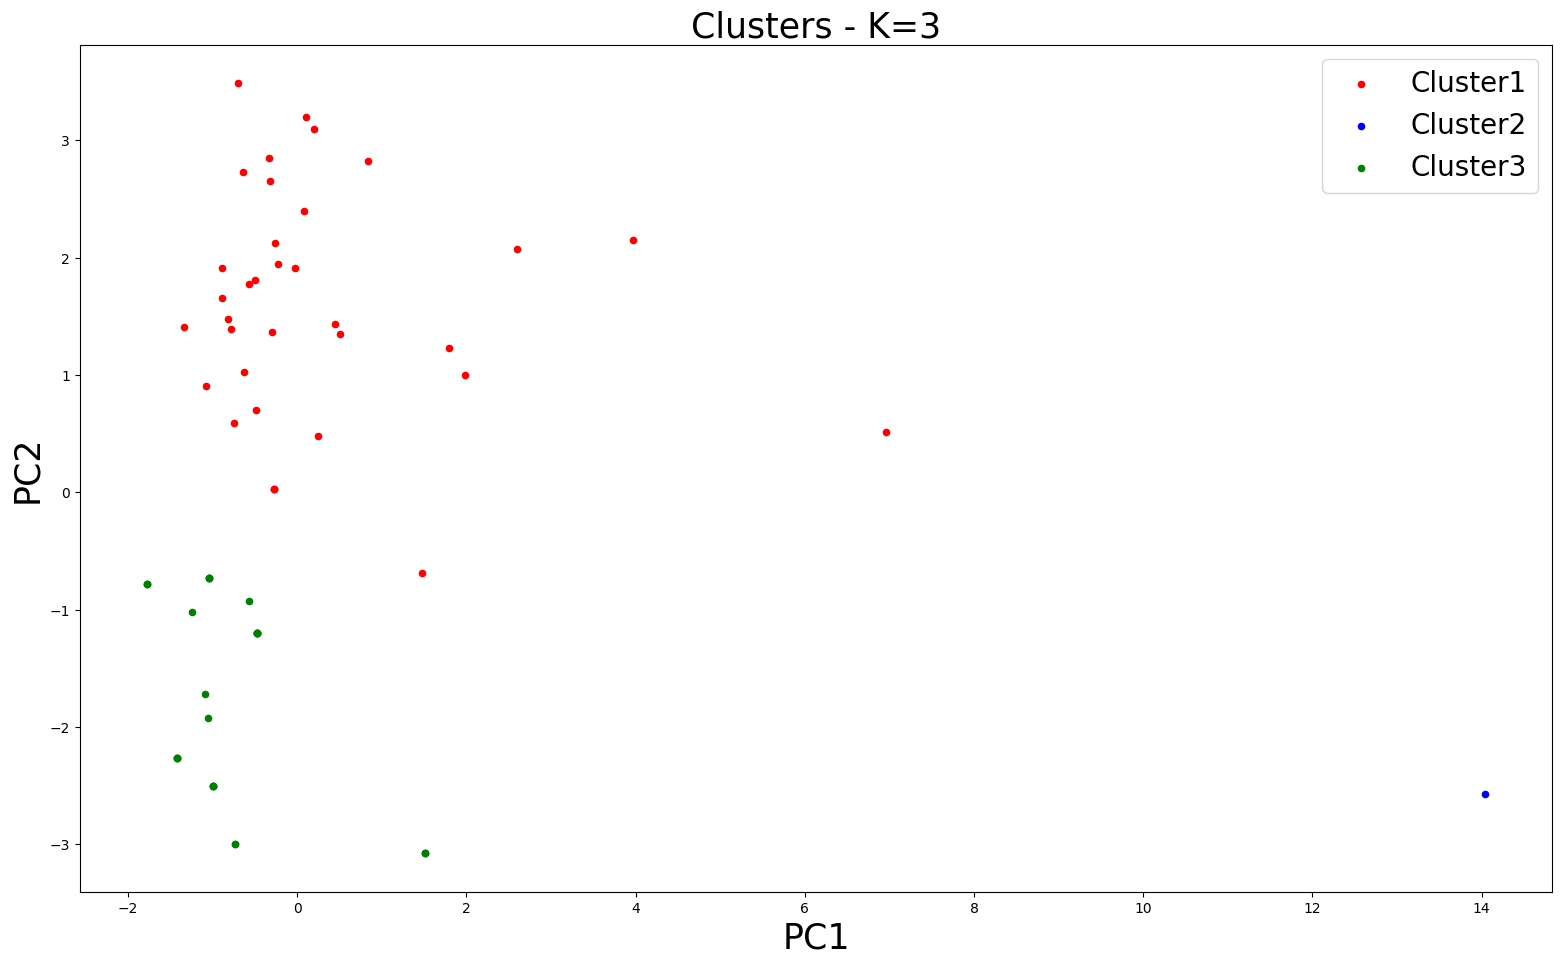

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage;

dendrogram(linkage(X_std, method="ward"), orientation = "right", labels = df.country_x.tolist());


#The number of clusters can be inferred from the dendrogram by drawing a vertical line on it.
# This should be where we find the biggest distances.
#In this question, it could be between approximately 11 and 19, generating 3 clusters.



#Justify answer with PCA plot scatter
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

pca = PCA(n_components=2);
principalComponents = pca.fit_transform(X_std);
print("Variability explained by first 2 PCs: ", round(np.sum(pca.explained_variance_ratio_),3))
#Variability explained by first 2 PCs:  0.661

PCs = pd.DataFrame(data = principalComponents, columns = ["PC1", "PC2"]);
# we choose cluster = 3
n_clusters_agglomerative = 3
model = AgglomerativeClustering(n_clusters=n_clusters_agglomerative, linkage="ward", compute_distances=True)
y_model = model.fit_predict(X_std);

# Plotting PCs
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
plt.scatter(PCs.iloc[y_model == 0, 0], PCs.iloc[y_model == 0, 1], s=20, c="red", label = "Cluster1");
plt.scatter(PCs.iloc[y_model == 1, 0], PCs.iloc[y_model == 1, 1], s=20, c="blue", label = "Cluster2");
plt.scatter(PCs.iloc[y_model == 2, 0], PCs.iloc[y_model == 2, 1], s=20, c="green", label = "Cluster3");

plt.xlabel("PC1", fontsize = 25);
plt.ylabel("PC2", fontsize = 25);
ax.set_title(f"Clusters - K={n_clusters_agglomerative}", fontsize = 25);
ax.set_title("Clusters - K=3", fontsize = 25);
plt.legend(fontsize = 20);
plt.show();

 #add the cluster label to the original dataset for further analyses
df["Cluster2"] = pd.DataFrame(y_model);

**(d)** What do you conclude? Provide an interesting remark(s). Justify your answers.  

In [19]:


#print economy level in different cluster

for i in range(n_clusters_kmeans):
    print("Kmeans Cluster ", i+1 ,":\n", list(df["WESP"][(df["Cluster1"]==i)]));
print("========================================================")


for i in range(n_clusters_agglomerative):
    print("Agglomerative Cluster ", i+1 ,":\n", list(df["WESP"][(df["Cluster2"]==i)]));
print("========================================================")



#1. Conclusion: there is a significant association between the "Cluster" and "WESP" variables.

#2. Check if the WESP is independent of cluaster or not.
from scipy.stats import chi2_contingency



data_crosstab = pd.crosstab(df['Cluster1'], df['WESP']); # contingency table
print("Kmeans Cluster cross table","\n",data_crosstab)
print(chi2_contingency(data_crosstab));
print("========================================================")

data_crosstab = pd.crosstab(df['Cluster2'], df['WESP']); # contingency table
print("Agglomerative Cluster cross table","\n",data_crosstab)
print(chi2_contingency(data_crosstab));
print("========================================================")



#3. Result: pvalue close to 0 , Therefore,  strong evidence against H0.
# This means that  there is a significant association between the "Cluster" and "WESP" variables
# Education level is closely related to national economy



Kmeans Cluster  1 :
 ['Developed']
Kmeans Cluster  2 :
 ['Developing', 'Developing', 'Developing', 'Developing', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed']
Kmeans Cluster  3 :
 ['Developed', 'Developed']
Kmeans Cluster  4 :
 ['Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developed', 'Developed']
Agglomerative Cluster